In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('big datamart_train.csv')

In [3]:
test=pd.read_csv('big datamart_test.csv')

In [4]:
train["source"]="train"
test["source"]="test"
d2=pd.concat([train,test],ignore_index=True)
d2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [5]:
d2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [6]:
d2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [7]:
d2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
d2.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
#there are null values in item weight,outlet size and item outlet sales.They have to be cleared first
#item weight is not an important factor for the sales of the product,so lets drop that column
#outlet size cannot be dropped because,people may purchase based on outlet size depending on their economic status,so lets treat the null values in that column with most frequent data.
#outlet sales is the assuming target column,so we cannot drop it.fill the na values with median of the column


In [9]:
d2.drop("Item_Weight",axis=1,inplace=True)

In [10]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
d2['Outlet_Size']=imp.fit_transform(d2['Outlet_Size'].values.reshape(-1,1))

In [11]:
d2['Item_Outlet_Sales']=d2['Item_Outlet_Sales'].fillna(d2['Item_Outlet_Sales'].median())

In [12]:
d2.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [13]:
print(d2["Item_Fat_Content"].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [14]:
print(d2["Item_Type"].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [15]:
print(d2["Outlet_Size"].unique())

['Medium' 'High' 'Small']


In [ ]:
#same content -low fat  and regular are displayed in different ways,it should be replaced first

In [16]:
d2["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)
d2["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)
d2["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [17]:
d2.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


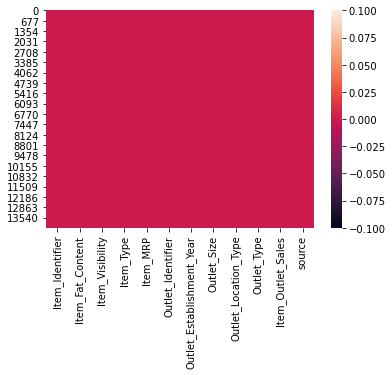

In [18]:
sns.heatmap(d2.isnull())

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","source"]
for val in list1:
    d2[val]=le.fit_transform(d2[val].astype(str))

In [20]:
d2.describe()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,0.353351,0.065953,7.229372,141.004977,4.722473,1997.830681,1.170867,1.112856,1.201281,2026.522094,0.600042
std,449.619658,0.478027,0.051459,4.213471,62.086938,2.837101,8.371664,0.600306,0.812755,0.796543,1335.388924,0.489907
min,0.000000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000,0.000000
25%,391.000000,0.000000,0.027036,4.000000,94.012000,2.000000,1987.000000,1.000000,0.000000,1.000000,1468.089000,0.000000
50%,782.000000,0.000000,0.054021,6.000000,142.247000,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000,1.000000
75%,1169.000000,1.000000,0.094037,10.000000,185.855600,7.000000,2004.000000,2.000000,2.000000,1.000000,2163.184200,1.000000
max,1558.000000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800,1.000000


In [21]:
#there are 14204 rows in the dataset
#there is large spread of data for item identifier,item mrp,outlet establishment year and item outlet sales
#there is a great difference between 75% and max for item identifier,item type, mrp and item outletsize.So there are presence of outliers

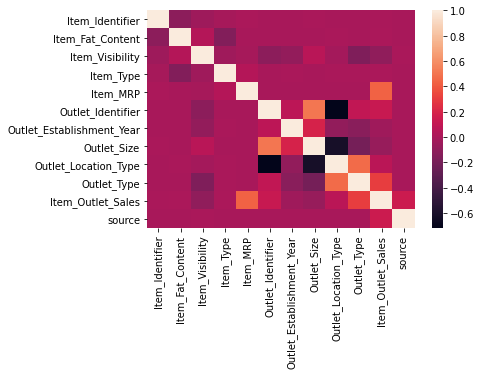

In [22]:
d2cor=d2.corr()
sns.heatmap(d2cor)

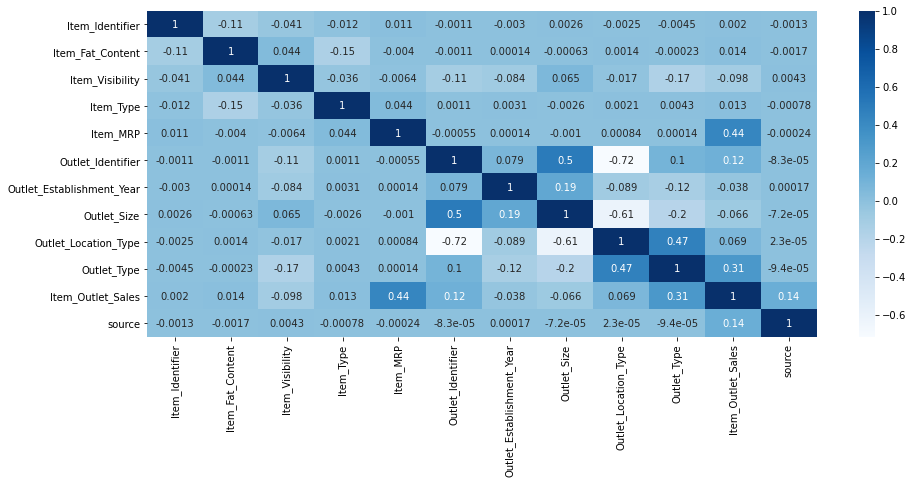

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(d2cor,cmap='Blues',annot=True)

In [24]:
#outlet sales have a good correlation with item mrp and outlet type.
#sales have less relation with item identifier,item fat content,item type and outlet location
#sales have negative relation with item visibility,outlet establishment year and outlet size

In [25]:
d2.drop("Outlet_Identifier",axis=1,inplace=True)
d2.drop("Item_Identifier",axis=1,inplace=True)

In [26]:
d2["Outlet_Establishment_Year"]=2013-d2["Outlet_Establishment_Year"]
d2["outlet years of operation"]=d2["Outlet_Establishment_Year"]
d2.drop(columns=["Outlet_Establishment_Year"],inplace=True)

In [27]:
d2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet years of operation
0,0,0.016047,4,249.8092,1,0,1,3735.1380,1,14
1,1,0.019278,14,48.2692,1,2,2,443.4228,1,4
2,0,0.016760,10,141.6180,1,0,1,2097.2700,1,14
3,1,0.000000,6,182.0950,1,2,0,732.3800,1,15
4,0,0.000000,9,53.8614,0,2,1,994.7052,1,26


In [28]:
d2.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.813869
source                      -0.408471
outlet years of operation    0.396465
dtype: float64

In [29]:
for col in d2.columns:
    if d2.skew().loc[col]>0.55:
        d2[col]=np.log1p(d2[col])
d2.skew()

Item_Fat_Content             0.613645
Item_Visibility              1.038885
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                 -0.235873
Item_Outlet_Sales           -1.404610
source                      -0.408471
outlet years of operation    0.396465
dtype: float64

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(d2))
threshold=3
print(np.where(z>3))

(array([   29,    49,    83,   108,   133,   174,   178,   210,   215,
         236,   255,   405,   417,   430,   434,   446,   487,   489,
         502,   509,   521,   532,   532,   540,   561,   574,   636,
         660,   687,   706,   719,   787,   827,   828,   836,   847,
         854,   861,   900,   906,   920,   938,   945,   973,  1025,
        1028,  1030,  1034,  1065,  1130,  1159,  1192,  1272,  1311,
        1311,  1324,  1337,  1351,  1423,  1434,  1434,  1447,  1454,
        1462,  1476,  1496,  1516,  1543,  1574,  1575,  1588,  1644,
        1651,  1651,  1657,  1701,  1708,  1758,  1776,  1788,  1805,
        1807,  1827,  1829,  1841,  1854,  1913,  1921,  1932,  2021,
        2055,  2088,  2088,  2119,  2122,  2131,  2251,  2313,  2324,
        2324,  2325,  2337,  2340,  2370,  2394,  2407,  2439,  2449,
        2491,  2571,  2582,  2586,  2586,  2613,  2663,  2692,  2711,
        2728,  2813,  2855,  2855,  2895,  2966,  3017,  3029,  3039,
        3041,  3053

In [31]:
d2_new=d2[(z<3).all(axis=1)]
print(d2.shape)
print(d2_new.shape)

(14204, 10)
(13802, 10)


In [32]:
#nearly 450 rows are deleted due to presence of outliers

In [33]:
d2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13802 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           13802 non-null  float64
 1   Item_Visibility            13802 non-null  float64
 2   Item_Type                  13802 non-null  int32  
 3   Item_MRP                   13802 non-null  float64
 4   Outlet_Size                13802 non-null  int32  
 5   Outlet_Location_Type       13802 non-null  int32  
 6   Outlet_Type                13802 non-null  float64
 7   Item_Outlet_Sales          13802 non-null  float64
 8   source                     13802 non-null  int32  
 9   outlet years of operation  13802 non-null  int64  
dtypes: float64(5), int32(4), int64(1)
memory usage: 970.5 KB


In [34]:
d2_train=d2_new[d2_new.loc[:,"source"]==1]
d2_test=d2_new[d2_new.loc[:,"source"]==0]
d2_test.reset_index(drop=True,inplace=True)
d2_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet years of operation
0,0.000000,0.007536,13,107.8622,1,0,0.693147,7.492945,0,14
1,0.693147,0.037708,4,87.3198,1,1,0.693147,7.492945,0,6
2,0.000000,0.094924,11,241.7538,1,2,0.000000,7.492945,0,15
3,0.000000,0.015271,13,155.0340,1,1,0.693147,7.492945,0,6
4,0.693147,0.112077,4,234.2300,1,2,1.386294,7.492945,0,28
...,...,...,...,...,...,...,...,...,...,...
5609,0.693147,0.013406,13,141.3154,2,0,0.693147,7.492945,0,16
5610,0.693147,0.133648,15,169.1448,1,2,1.098612,7.492945,0,4
5611,0.000000,0.070951,8,118.7440,1,1,0.693147,7.492945,0,11
5612,0.693147,0.000000,3,214.6218,1,1,0.693147,7.492945,0,6


In [35]:
d2_train.drop(columns=["source"],inplace=True)
d2_test.drop(columns=["source"],inplace=True)

In [36]:
d2_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,outlet years of operation
0,0.000000,0.015920,4,249.8092,1,0,0.693147,8.225808,14
1,0.693147,0.019095,14,48.2692,1,2,1.098612,6.096776,4
2,0.000000,0.016621,10,141.6180,1,0,0.693147,7.648868,14
3,0.693147,0.000000,6,182.0950,1,2,0.000000,6.597664,15
4,0.000000,0.000000,9,53.8614,0,2,0.693147,6.903451,26
...,...,...,...,...,...,...,...,...,...
8518,0.000000,0.055230,13,214.5218,0,2,0.693147,7.929984,26
8519,0.693147,0.045912,0,108.1570,1,1,0.693147,6.310436,11
8520,0.000000,0.034581,8,85.1224,2,1,0.693147,7.085159,9
8521,0.693147,0.135597,13,103.1332,1,2,1.098612,7.521100,4


In [37]:
x=d2_train.drop(columns=["Item_Outlet_Sales"])
y=d2_train[["Item_Outlet_Sales"]]

In [38]:
d2_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.73758503, -1.02480354, -0.76858009, ..., -1.38900564,
        -0.17645899, -0.11192506],
       [ 1.35577588, -0.95179964,  1.6056498 , ...,  1.09747844,
         1.02040048, -1.31177109],
       [-0.73758503, -1.00867817,  0.65595785, ..., -1.38900564,
        -0.17645899, -0.11192506],
       ...,
       [-0.73758503, -0.59569209,  0.18111187, ..., -0.1457636 ,
        -0.17645899, -0.71184807],
       [ 1.35577588,  1.72711942,  1.36822682, ...,  1.09747844,
         1.02040048, -1.31177109],
       [-0.73758503, -0.38140589,  1.6056498 , ..., -1.38900564,
        -0.17645899,  0.12804415]])

In [40]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [56]:
max_r_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 45 is 0.6053221090036551


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [43]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [44]:
lm.coef_

array([[ 0.01214206, -0.02841919,  0.00742813,  0.47401544, -0.14495741,
        -0.26163246,  0.54272832, -0.03923117]])

In [45]:
lm.intercept_

array([7.39870554])

In [46]:
lm.score(x_train,y_train)

0.5616347026833726

In [47]:
pred=lm.predict(x_test)
print('predicted o/p:',pred)
print('actual o/p',y_test)

predicted o/p: [[7.5503956 ]
 [7.59578793]
 [6.3982644 ]
 ...
 [8.41437071]
 [7.88053193]
 [6.83056698]]
actual o/p       Item_Outlet_Sales
4716           8.065744
2494           8.018641
2756           6.522263
2080           7.363669
2905           7.968288
...                 ...
3342           7.409853
4590           6.938277
119            7.041278
2823           7.543561
257            5.268281

[1802 rows x 1 columns]


In [48]:
print('error:')
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.45068496862019514
mean squared error: 0.3344530055466867
root mean squared error: 0.5783191208551614


In [49]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5959588441997592


In [50]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=10)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.57275352 0.58546474 0.57587347 0.56845061 0.53185967 0.56801826
 0.57535904 0.56154432 0.59677991 0.54595634]
0.568205989422822 0.017622555647755705


In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,predrf))
print('mean squared error:',mean_squared_error(y_test,predrf))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

mean absolute error: 0.42239920242300394
mean squared error: 0.29334648366701344
root mean squared error: 0.5416147003793503
0.6559815200054362


In [52]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print('mean absolute error:',mean_absolute_error(y_test,ad_pred))
print('mean squared error:',mean_squared_error(y_test,ad_pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

mean absolute error: 0.4551126453750469
mean squared error: 0.3107361167205288
root mean squared error: 0.5574370966490558
0.6246104006647497


In [63]:
import joblib
joblib.dump(rf,'rf_datamart_sales.pkl')

['rf_datamart_sales.pkl']